In [1]:
import mysql.connector
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pandas as pd

In [2]:
# remote.close()
import mysql.connector
remote = mysql.connector.connect(
    host = "database-1.**************.amazonaws.com", #insert sql path
    port = 3306,
    user = "eda",
    password = "*******",
    database= 'eda'
)
cur = remote.cursor(buffered=True)

In [3]:
sql = """ select city, year, pop_foreign from foreign_pop
    where (city='서울특별시' or city='경기도' or city='인천광역시') and year between 2006 and 2017
    order by city ,year
        ; 
    """

cur.execute(sql)
result = cur.fetchall()


In [4]:
forein_pop=pd.DataFrame(result,columns=['city','year','pop_foreign'])

In [5]:
forein_pop.head()

,city,year,pop_foreign
0,경기도,2007,214727
1,경기도,2008,277991
2,경기도,2009,323964
3,경기도,2010,337821
4,경기도,2011,380606


/tmp/ipykernel_4609/4148976566.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(forein_pop['year'],rotation=90)


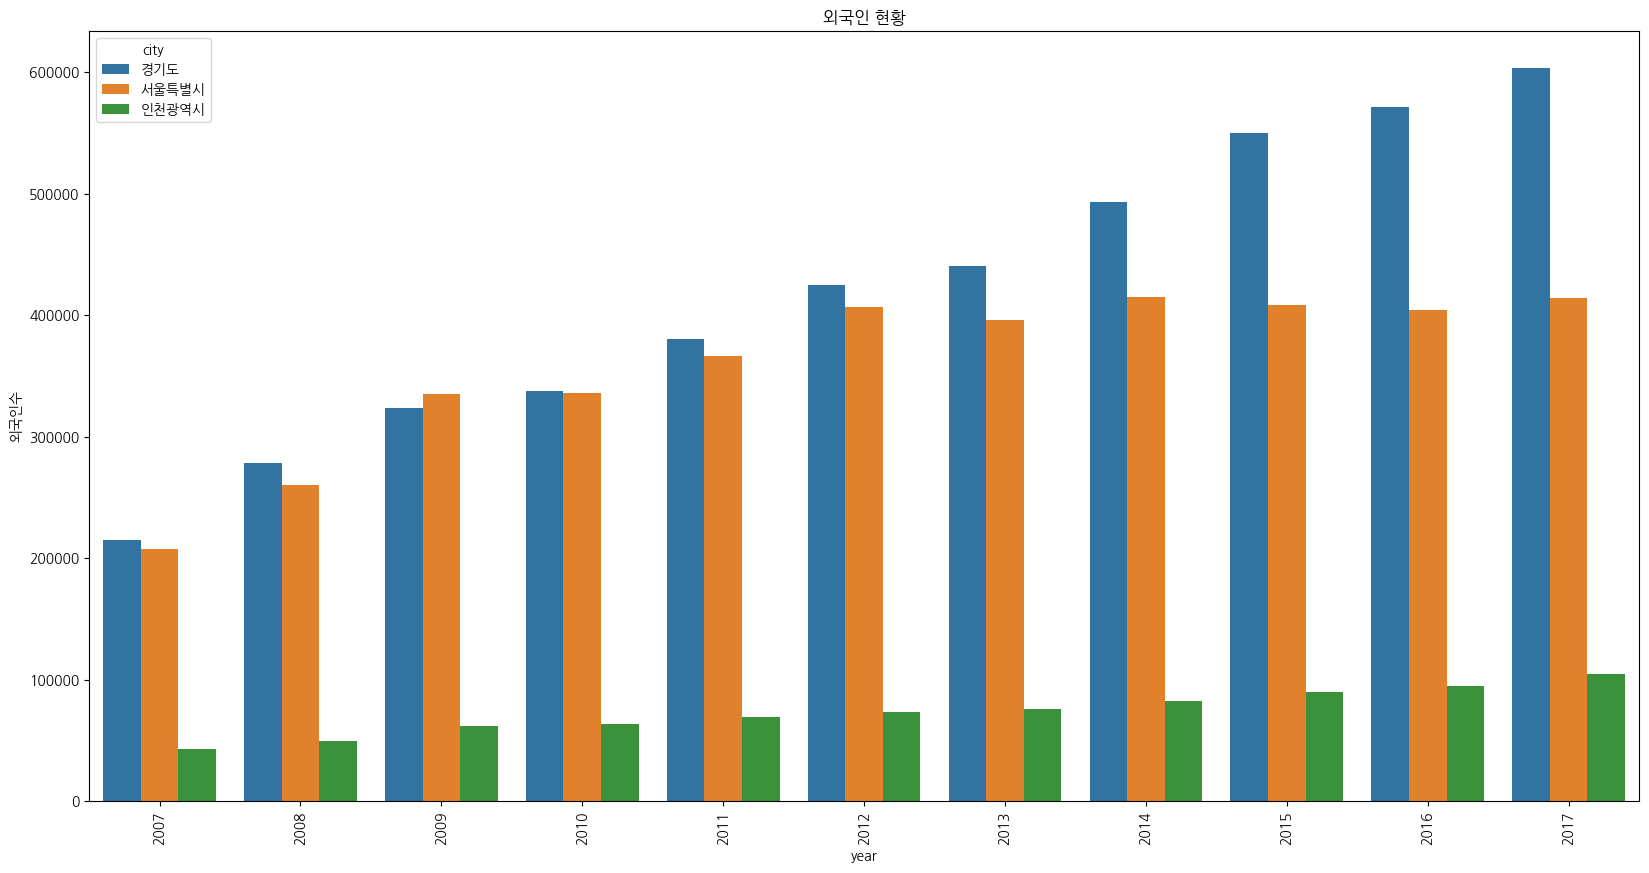

In [6]:
f , ax = plt.subplots(figsize=(20,10))
sns.barplot(data=forein_pop,x='year',y='pop_foreign',hue='city',ax=ax)
ax.set_xticklabels(forein_pop['year'],rotation=90)
# ax[0][0].set_xlabel('')
ax.set_title('외국인 현황')
ax.set_ylabel('외국인수')

plt.show()

In [35]:
factory_bms_df_list=[]
for i,type in enumerate(['대기업','중기업','소기업']):
    sql = """ select city, type, year, open, cum_open 
    from (select city,type, year,month,open, sum(open) over (partition by city order by year asc, month asc) as cum_open from factory 
            where type='{}' and (city in ('서울특별시','인천광역시','경기도'))) as result 
            where (result.month='07' and year>=2007) or(result.year=2017)
            order by city asc, year; 
        """.format(type)

    cur.execute(sql)
    result = cur.fetchall()
    factory_bms_df_list.append(pd.DataFrame(result,columns=['city','type','year','open','cum_open']))



/tmp/ipykernel_4609/465826490.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(factory_bms_df_list[0]['year'],rotation=90)
/tmp/ipykernel_4609/465826490.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(factory_bms_df_list[1]['year'],rotation=90)
/tmp/ipykernel_4609/465826490.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(factory_bms_df_list[2]['year'],rotation=90)


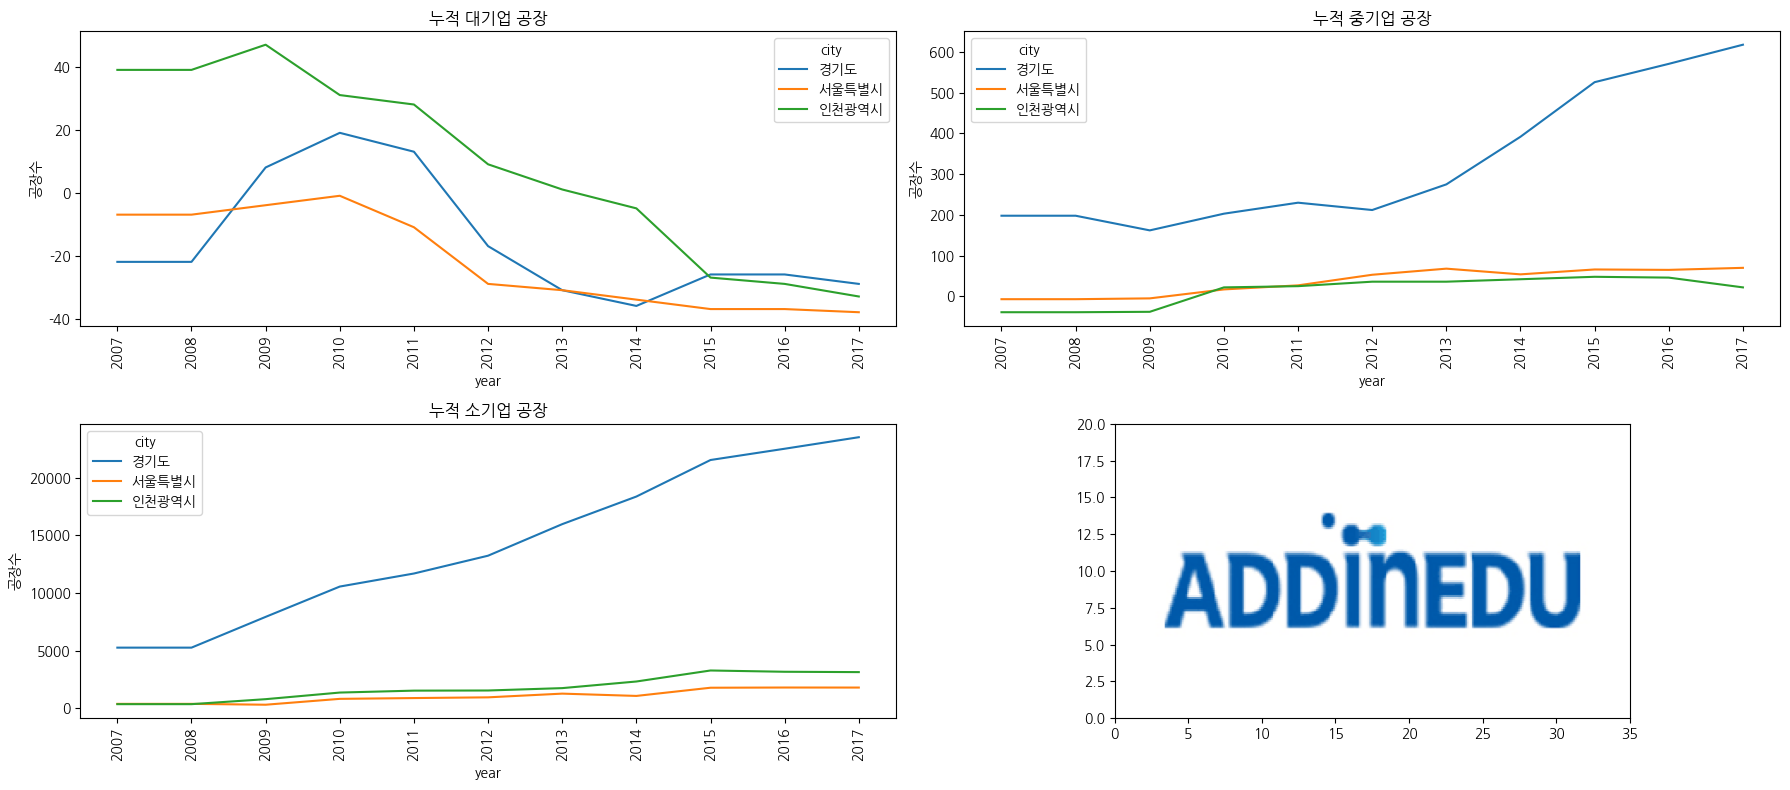

In [37]:
f , ax = plt.subplots(2,2,figsize=(18,8))


sns.lineplot(data=factory_bms_df_list[0],x='year',y='cum_open',hue='city',ax=ax[0][0])
ax[0][0].set_xticklabels(factory_bms_df_list[0]['year'],rotation=90)
ax[0][0].set_title('누적 대기업 공장')
ax[0][0].set_ylabel('공장수')


sns.lineplot(data=factory_bms_df_list[1],x='year',y='cum_open',hue='city',ax=ax[0][1])
ax[0][1].set_xticklabels(factory_bms_df_list[1]['year'],rotation=90)
ax[0][1].set_title('누적 중기업 공장')
ax[0][1].set_ylabel('공장수')

sns.lineplot(data=factory_bms_df_list[2],x='year',y='cum_open',hue='city',ax=ax[1][0])
ax[1][0].set_xticklabels(factory_bms_df_list[2]['year'],rotation=90)
ax[1][0].set_title('누적 소기업 공장')
ax[1][0].set_ylabel('공장수')

from PIL import Image
img= Image.open('/home/zeki/dev_ws/addinedu.png')
img=img.resize((300,300))
ax[1][1].imshow(img,extent=(0,35,0,20))

plt.tight_layout()

/tmp/ipykernel_4609/2915088175.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(factory_bms_df_list[0]['year'],rotation=90)
/tmp/ipykernel_4609/2915088175.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(factory_bms_df_list[1]['year'],rotation=90)
/tmp/ipykernel_4609/2915088175.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(factory_bms_df_list[2]['year'],rotation=90)


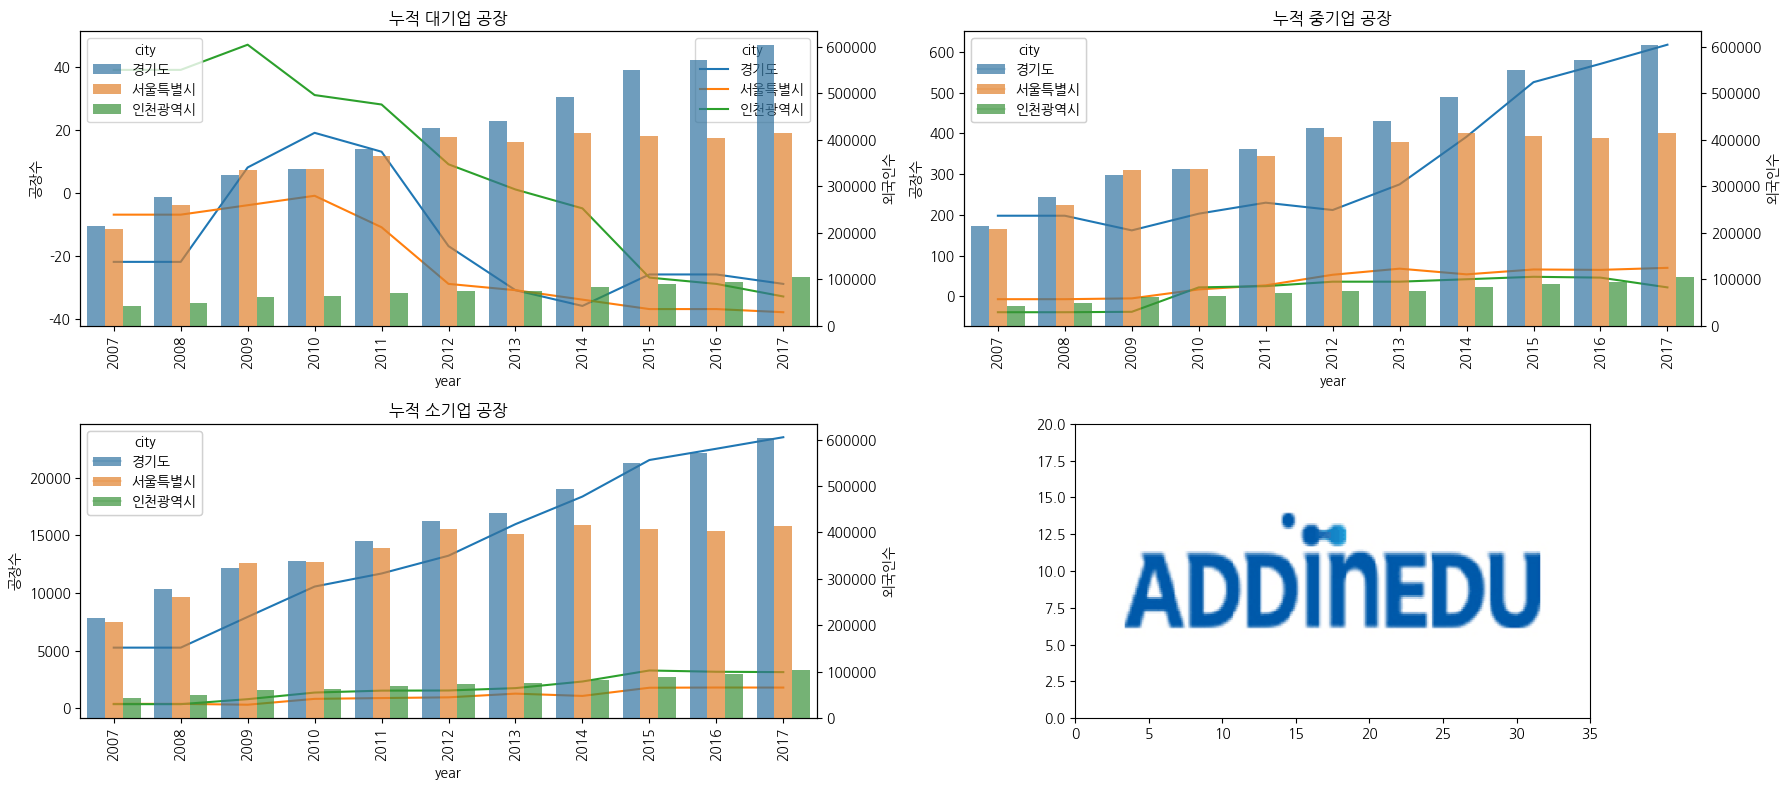

In [56]:
f , ax = plt.subplots(2,2,figsize=(18,8))

sns.lineplot(data=factory_bms_df_list[0],x='year',y='cum_open',hue='city',ax=ax[0][0])
ax[0][0].set_xticklabels(factory_bms_df_list[0]['year'],rotation=90)
ax[0][0].set_title('누적 대기업 공장')
ax[0][0].set_ylabel('공장수')
ax0_2=ax[0][0].twinx()
sns.barplot(data=forein_pop,x='year',y='pop_foreign',hue='city',ax=ax0_2,alpha=0.7)
ax0_2.set_ylabel('외국인수')

sns.lineplot(data=factory_bms_df_list[1],x='year',y='cum_open',hue='city',ax=ax[0][1])
ax[0][1].set_xticklabels(factory_bms_df_list[1]['year'],rotation=90)
ax[0][1].set_title('누적 중기업 공장')
ax[0][1].set_ylabel('공장수')

ax1_2=ax[0][1].twinx()
sns.barplot(data=forein_pop,x='year',y='pop_foreign',hue='city',ax=ax1_2,alpha=0.7)
ax1_2.set_ylabel('외국인수')


sns.lineplot(data=factory_bms_df_list[2],x='year',y='cum_open',hue='city',ax=ax[1][0])
ax[1][0].set_xticklabels(factory_bms_df_list[2]['year'],rotation=90)
ax[1][0].set_title('누적 소기업 공장')
ax[1][0].set_ylabel('공장수')

ax2_2=ax[1][0].twinx()
sns.barplot(data=forein_pop,x='year',y='pop_foreign',hue='city',ax=ax2_2,alpha=0.7)
ax2_2.set_ylabel('외국인수')


from PIL import Image
img= Image.open('/home/zeki/dev_ws/addinedu.png')
img=img.resize((300,300))
ax[1][1].imshow(img,extent=(0,35,0,20))

plt.tight_layout()

In [40]:
df_list=[]
#총인구수
for city in ['서울특별시','경기도','인천광역시']:
    sql="""select p.pop_sum
        from population p, factory f
        where concat(p.year,p.month)=concat(f.year,f.month) 

            and p.city='{}' and f.city='{}'

            ;
        """.format(city,city)
    cur.execute(sql)
    result = cur.fetchall()
    
    df_list.append(pd.DataFrame(result,columns=['{}인구수'.format(city)]))

#외국인
    sql = """ select pop_foreign from foreign_pop
        where city='{}' and year between 2007 and 2017
        order by city ,year
            ; 
        """.format(city)

    cur.execute(sql)
    result = cur.fetchall()
    df_list.append(pd.DataFrame(result,columns=['{} 외국인 인구수'.format(city)]))

    for type in ['대기업','중기업','소기업']:
        sql="""select sum(f.open) over (partition by f.city order by f.year asc, f.month asc) as cum_open
        from population p, factory f
        where concat(p.year,p.month)=concat(f.year,f.month) 
            and f.type='{}'
            and f.city='{}'
            and p.city='{}'

            ;
        """.format(type,city,city)
        cur.execute(sql)
        result = cur.fetchall()

        df_list.append(pd.DataFrame(result,columns=['{} {}공장누적수'.format(city,type)]))


In [41]:
pop_fact_foreign_df=pd.concat(df_list,axis=1)

In [42]:
pop_fact_foreign_df.head()

,서울특별시인구수,서울특별시 외국인 인구수,서울특별시 대기업공장누적수,서울특별시 중기업공장누적수,서울특별시 소기업공장누적수,경기도인구수,경기도 외국인 인구수,경기도 대기업공장누적수,경기도 중기업공장누적수,경기도 소기업공장누적수,인천광역시인구수,인천광역시 외국인 인구수,인천광역시 대기업공장누적수,인천광역시 중기업공장누적수,인천광역시 소기업공장누적수
0,10196644,207417.0,0,0,0,11212042,214727.0,0,0,0,2687508,43093.0,0,0,0
1,10196644,260019.0,3,7,84,11212042,277991.0,10,-18,1187,2687508,49253.0,4,2,107
2,10196644,334910.0,3,2,-75,11212042,323964.0,30,-36,2671,2687508,61522.0,8,1,433
3,10207304,336221.0,6,7,90,11300278,337821.0,42,-16,3882,2693123,63575.0,12,19,660
4,10207304,366279.0,6,24,434,11300278,380606.0,41,5,5303,2693123,69350.0,-8,61,1007


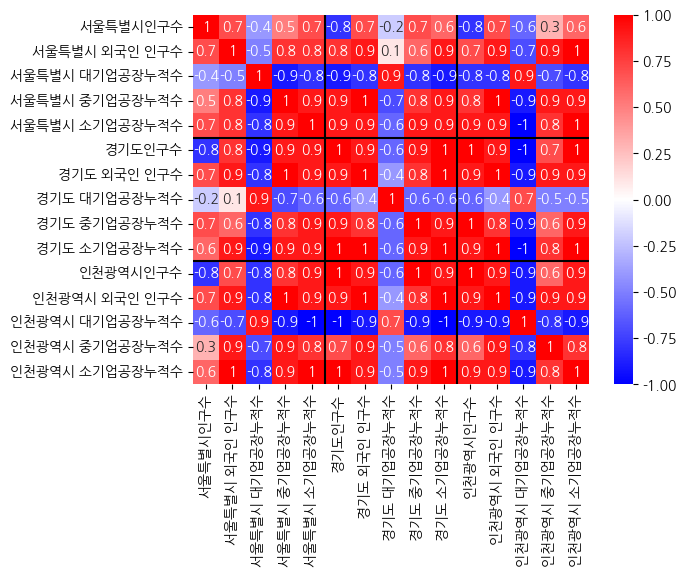

In [43]:
correlation_matrix=pop_fact_foreign_df.corr().round(1)
sns.heatmap(data=correlation_matrix,annot=True,cmap='bwr')
for x in range(5, correlation_matrix.shape[1], 5):
    plt.vlines(x, 0, correlation_matrix.shape[0], colors='black', linestyles='solid')
    plt.hlines(x, 0, correlation_matrix.shape[0], colors='black', linestyles='solid')